In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('bsbm.csv')
df

,program,profile,graph,loading,process
0,java,RDFS,4987,1.574000,0.230000
1,java,RDFS,4987,0.055000,0.209000
2,java,RDFS,4987,0.403000,0.116000
3,java,RDFS,4987,0.077000,0.058000
4,java,RDFS,4987,0.095000,0.032000
5,java,RHODF,4987,0.041000,0.011000
6,java,RHODF,4987,0.037000,0.013000
7,java,RHODF,4987,0.026000,0.005000
8,java,RHODF,4987,0.032000,0.000000
9,java,RHODF,4987,0.031000,0.016000


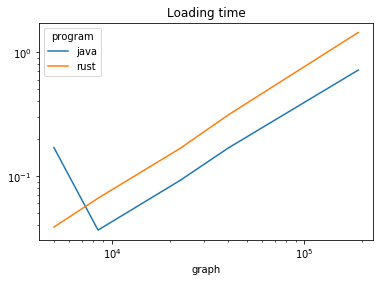

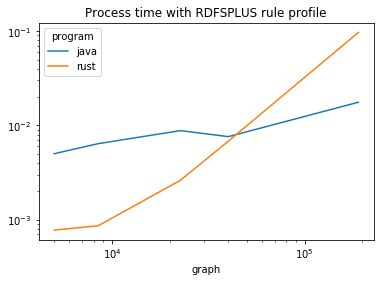

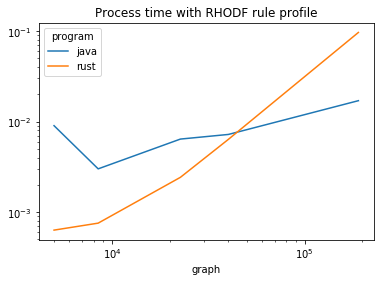

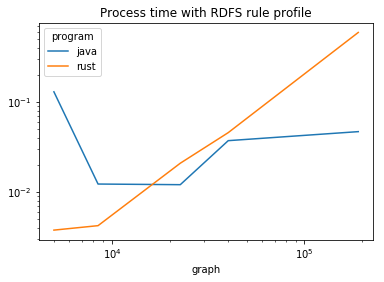

In [9]:
profiles = list(set(df['profile']))
data = df.groupby(['program','graph'])
means = data['loading'].mean().unstack().transpose()
ax = means.plot(title='Loading time',loglog=True)
ax
for profile in profiles:
    data = df[df['profile']==profile].groupby(['program','graph'])
    means = data['process'].mean().unstack().transpose()
    ax = means.plot(title='Process time with {} rule profile'.format(profile),loglog=True)
    ax